In [ ]:
# importing libraries
import numpy as np
from skimage import color
from skimage.transform import rescale
from matplotlib import image
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

age: 9
gender: 1


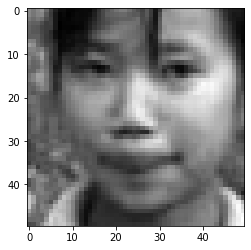

age: 1
gender: 1


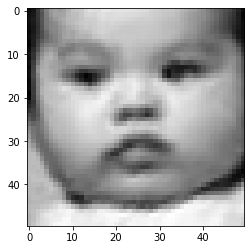

age: 16
gender: 0


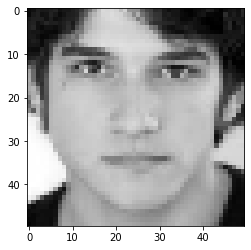

age: 1
gender: 1


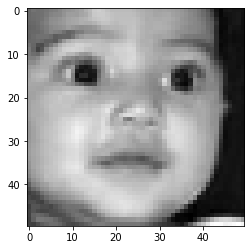

age: 26
gender: 1


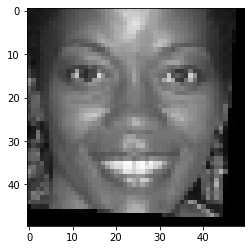

age: 2
gender: 0


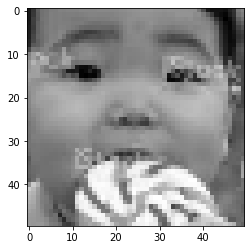

age: 53
gender: 1


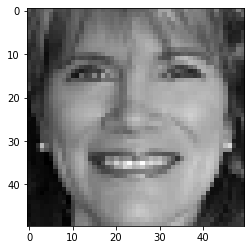

age: 36
gender: 1


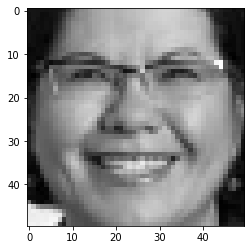

age: 37
gender: 0


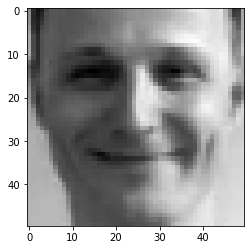

age: 10
gender: 0


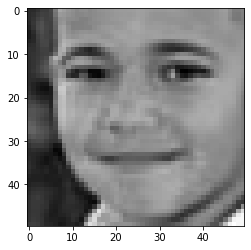

age: 1
gender: 0


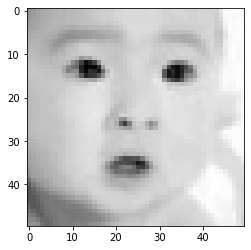

age: 52
gender: 0


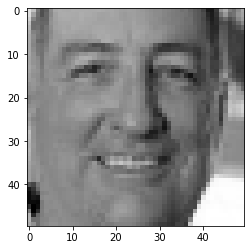

In [ ]:
import glob
import os

Faces =[]
Ages = []
Genders = []
# Visualize some examples of resize image
for k,i in enumerate(glob.glob(r"FaceData/*")):

    # load image
    imagei = image.imread(i)
    print("age:",os.path.basename(i).split("_")[0])
    print("gender:",os.path.basename(i).split("_")[1]) #male 0, female 1
    Ages.append(os.path.basename(i).split("_")[0])
    Genders.append(os.path.basename(i).split("_")[1])

    # Convert to grayscale images
    imagei = color.rgb2gray(imagei)

    # Resize image
    image_rescaled = rescale(imagei, 0.25, anti_aliasing=False)

    # Visualize them
    plt.figure()
    plt.imshow(image_rescaled, cmap='gray')
    plt.show()

    Faces.append(image_rescaled.flatten())

    if k>10:
        break

In [ ]:
D_input = np.array(Faces).astype(float)

y_age = np.array(Ages).astype(float)/100
y_gender = np.array(Genders).astype(float)*2-1

In [ ]:
y_gender

array([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.])

## Please use exactly the same train_test_split

In [ ]:
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(D_input, y_age, y_gender, test_size=0.1, random_state=205)


## Please test your model using the face images of all team members

In [ ]:
# eigendecomposition and SVD

# ANN Approach

,a,b,a xor b
1,1,1,-1
2,1,-1,1
3,-1,1,1
4,-1,-1,-1


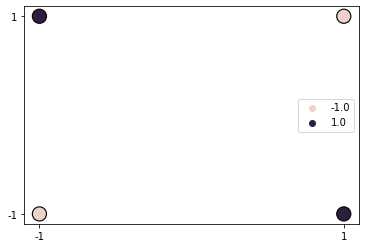

In [ ]:
import ttg
import seaborn as sns

AB_df = ttg.Truths(['a', 'b'],['a xor b']).as_pandas()
AB_df["a"] = AB_df["a"]*2 -1
AB_df["b"] = AB_df["b"]*2 -1
AB_df["a xor b"] = AB_df["a xor b"]*2 -1

AB = np.array(AB_df,dtype='float')

plt.figure()
sns.scatterplot(x=AB[:, 0], y=AB[:, 1], hue=AB[:, 2], alpha=1.0, edgecolor="black",s=200)
plt.xticks([-1,1], ["-1","1"])

plt.yticks([-1,1], ["-1","1"])

X = AB[:,:2]
y = AB[:,2]


AB_df

In [ ]:
#classification
X_train = X
y_train = y

neuron_in_hidden_layer = 10 # number of hidden neuron in the hidden layer

W_hidden = np.random.randn(neuron_in_hidden_layer,X_train.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer


def predict(X, W_hidden,W_output):

    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])

    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.01

for e in range(200):# for each epoch
    for i in range(X_train.shape[0]):
        # define your input and output
        x_i = X_train[i:i+1]
        y_i = y_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        # Gradient Descent rule
        W_output = W_output -  learning_rate*Gradient_output


        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule
        W_hidden = W_hidden -  learning_rate * Gradient_hidden


    y_pred,_,_ = predict(X_train, W_hidden,W_output)
    print(y_train>0,y_pred[:,0]>0)
    print(y_train,y_pred[:,0])
    print("Accuracy:",np.sum(np.sign(y_train)==np.sign(y_pred[:,0]))/y.shape[0])

[False  True  True False] [False False False False]
[-1.  1.  1. -1.] [-1.20064147 -3.1156234  -1.63243997 -3.75730467]
Accuracy: 0.5
[False  True  True False] [False False False False]
[-1.  1.  1. -1.] [-0.90095093 -2.74680969 -1.35399778 -3.43531079]
Accuracy: 0.5
[False  True  True False] [False False False False]
[-1.  1.  1. -1.] [-0.64576322 -2.42461777 -1.11494525 -3.15320179]
Accuracy: 0.5
[False  True  True False] [False False False False]
[-1.  1.  1. -1.] [-0.42882902 -2.14252554 -0.9096683  -2.90534532]
Accuracy: 0.5
[False  True  True False] [False False False False]
[-1.  1.  1. -1.] [-0.24485658 -1.89504335 -0.73343813 -2.6870244 ]
Accuracy: 0.5
[False  True  True False] [False False False False]
[-1.  1.  1. -1.] [-0.08932983 -1.67751283 -0.58223759 -2.49425397]
Accuracy: 0.5
[False  True  True False] [ True False False False]
[-1.  1.  1. -1.] [ 0.04162719 -1.48595695 -0.45263267 -2.32364407]
Accuracy: 0.25
[False  True  True False] [ True False False False]
[-1.  1. 

# Hints using Iris data

In [ ]:
# import data
iris = datasets.load_iris()

# extract the first two columns
X = iris.data[:, :3]
y = iris.data[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=205) # 70% training and 30% test

In [ ]:
X_train_mean = np.mean(X_train,axis=0)[None,:]
X_train_mean

array([[5.78740741, 3.07111111, 3.63333333]])

In [ ]:
# Demean
X_train_demean = X_train - X_train_mean
X_test_demean = X_test - X_train_mean

In [ ]:
Q, s, PT = np.linalg.svd(X_train_demean)

e_values_sqr = s/X_train.shape[0]**0.5

In [ ]:
X_train_whitten = X_train_demean@PT.T@np.linalg.inv(np.diag(e_values_sqr))
X_test_whitten = X_test_demean@PT.T@np.linalg.inv(np.diag(e_values_sqr))

In [ ]:
k = 2
X_train_whitten_reduced = X_train_demean@PT.T[:,:k]@np.linalg.inv(np.diag(e_values_sqr[:k]))
X_test_whitten_reduced = X_test_demean@PT.T[:,:k]@np.linalg.inv(np.diag(e_values_sqr[:k]))

In [ ]:
neuron_in_hidden_layer = 2 # number of hidden neuron in the hidden layer

W_hidden = np.random.randn(neuron_in_hidden_layer,X_train_whitten_reduced.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer


#regression
def predict(X, W_hidden,W_output):

    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])

    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.01

for e in range(20):# for each epoch
    for i in range(X_train.shape[0]):
        #define input and output
        x_i = X_train_whitten_reduced[i:i+1]
        y_i = y_train[i]

        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i

        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T

        # Gradient Descent rule
        W_output = W_output -  learning_rate*Gradient_output


        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k

        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):

            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1

        # Gradient Descent rule
        W_hidden = W_hidden -  learning_rate * Gradient_hidden


    y_pred,_,_ = predict(X_train_whitten_reduced, W_hidden,W_output)
    print(mean_squared_error(y_train,y_pred))


0.577951297431238
0.4890836845958741
0.4200808211504443
0.3539755412270041
0.29269473991718675
0.23843200367577466
0.19252691100406752
0.15519606658046842
0.1257944254532991
0.10321782029409113
0.08622637749358522
0.07364074877473838
0.0644361888469631
0.057771738248156186
0.05298394036898981
0.049564246017887156
0.04713128486913234
0.04540389332721385
0.04417756082317051
0.04330512596553015


In [ ]:
y_pred_test,_,_ = predict(X_test_whitten_reduced, W_hidden,W_output)
print(mean_squared_error(y_test,y_pred_test))

0.06500966978492338


In [ ]:
X_test_whitten_reduced.shape

(15, 2)